In [41]:
import pynbody
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Necesito calcular la densidad de pares teoricos para calcular la funcion de correlacion. Para ver la correlacion con las estrellas o el gas necesito primero saber cuantas estrellas se me forman, para esto voy a necesitar el box homogeneo. Pero en el caso de la correlacion estrella-materia oscura voy a necesitar ver en un box a una dada masa por particulas, cuantas particulas tengo. 
Yo estaba trabajando con un box de 200 Mpc (correlacion.f90), y mi masa por particula de dm es masa_dm=0.09328805

In [42]:
path='/mnt/is0/fstasys/512_b/512_mass/out/'
s=pynbody.load(path+'snapshot_047')

In [6]:
s.properties

{'omegaM0': 0.276,
 'omegaL0': 0.724,
 'boxsize': Unit("1.25e+02 Mpc a h**-1"),
 'a': 0.8354841246321474,
 'h': 0.703,
 'time': Unit("8.91e-03 Mpc s a**1/2 h**-1 km**-1")}

In [43]:
estrellas=len(s.star['mass'])
darkmatter=len(s.dm['mass'])

In [5]:
np.max(s.star['mass'])

SimArray(0.018173, dtype=float32, '1.00e+10 Msol h**-1')

In [6]:
len(s.star['mass'])

10439184

Voy a calcular la fraccion del universo que es estrella

In [7]:
bf=len(s.star['mass'])/len(s.gas['mass'])
print('baryon fraction:',bf)

baryon fraction: 0.08433758923517472


In [4]:
masa_gs = 0.0181731e10
lbox    = 125
vol=lbox**3

trazers_u=250666
trazers_s=4891
trazers_r=16936
dpares_st_r=trazers_r*len(s.star['mass'])/vol
dpares_gs_r=trazers_r*len(s.gas['mass'])/vol
dpares_dm_r=trazers_r*len(s.dm['mass'])/vol
dpares_st_s=trazers_s*len(s.star['mass'])/vol
dpares_gs_s=trazers_s*len(s.gas['mass'])/vol
dpares_dm_s=trazers_s*len(s.dm['mass'])/vol
dpares_st_u=trazers_u*len(s.star['mass'])/vol
dpares_gs_u=trazers_u*len(s.gas['mass'])/vol
dpares_dm_u=trazers_u*len(s.dm['mass'])/vol

In [8]:
200**3

8000000

In [9]:
s=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/correlacion_S.dat')
r=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/correlacion_R.dat')
u=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/correlacion_out.dat')

In [10]:
pares_teoricos_st_r=[]
pares_teoricos_gs_r=[]
pares_teoricos_dm_r=[]
pares_teoricos_st_s=[]
pares_teoricos_gs_s=[]
pares_teoricos_dm_s=[]
pares_teoricos_st_u=[]
pares_teoricos_gs_u=[]
pares_teoricos_dm_u=[]
rs=0.001; rr=0.001;ru=0.001

for i in range(len(s)):
    vs=(4./3.)*np.pi*(s[i,0]**3-rs**3)
    vr=(4./3.)*np.pi*(r[i,0]**3-rr**3)
    vu=(4./3.)*np.pi*(u[i,0]**3-ru**3)

    pares_teoricos_st_r.append(dpares_st_r*vr)
    pares_teoricos_gs_r.append(dpares_gs_r*vr)
    pares_teoricos_dm_r.append(dpares_dm_r*vr)
    pares_teoricos_st_s.append(dpares_st_s*vs)
    pares_teoricos_gs_s.append(dpares_gs_s*vs)
    pares_teoricos_dm_s.append(dpares_dm_s*vs)
    pares_teoricos_st_u.append(dpares_st_u*vr)
    pares_teoricos_gs_u.append(dpares_gs_u*vr)
    pares_teoricos_dm_u.append(dpares_dm_u*vr)
    rs=s[i,0]
    rr=r[i,0]
    ru=u[i,0]
     


pares_teoricos_st_r=np.array(pares_teoricos_st_r)
pares_teoricos_gs_r=np.array(pares_teoricos_gs_r)
pares_teoricos_dm_r=np.array(pares_teoricos_dm_r)
pares_teoricos_st_s=np.array(pares_teoricos_st_s)
pares_teoricos_gs_s=np.array(pares_teoricos_gs_s)
pares_teoricos_dm_s=np.array(pares_teoricos_dm_s)
pares_teoricos_st_u=np.array(pares_teoricos_st_u)
pares_teoricos_gs_u=np.array(pares_teoricos_gs_u)
pares_teoricos_dm_u=np.array(pares_teoricos_dm_u)

In [11]:
xi_st_r=(r[:,1])/(pares_teoricos_st_r)-1.
xi_gs_r=(r[:,2])/(pares_teoricos_gs_r)-1.
xi_dm_r=(r[:,3])/(pares_teoricos_dm_r)-1.

xi_st_s=(s[:,1])/(pares_teoricos_st_s)-1.
xi_gs_s=(s[:,2])/(pares_teoricos_gs_s)-1.
xi_dm_s=(s[:,3])/(pares_teoricos_dm_s)-1.

xi_st_u=(u[:,1])/(pares_teoricos_st_u)-1.
xi_gs_u=(u[:,2])/(pares_teoricos_gs_u)-1.
xi_dm_u=(u[:,3])/(pares_teoricos_dm_u)-1.

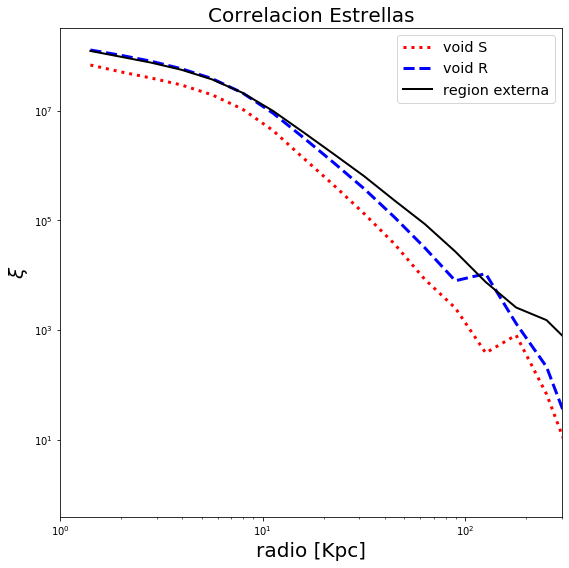

In [15]:
plt.figure(figsize=(9,9))
plt.title('Correlacion Estrellas',size=20)
plt.plot(s[:,0]*1e3,xi_st_s,label='void S',ls='dotted',lw=3,color='red')
plt.plot(r[:,0]*1e3,xi_st_r,label='void R',ls='--',lw=3,color='blue')
plt.plot(u[:,0]*1e3,xi_st_u,label='region externa',color='black',lw=2)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Kpc]',size=20)
plt.semilogx()
plt.semilogy()

plt.xlim(1,300)
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/Correlacion_stars.png',format='png')

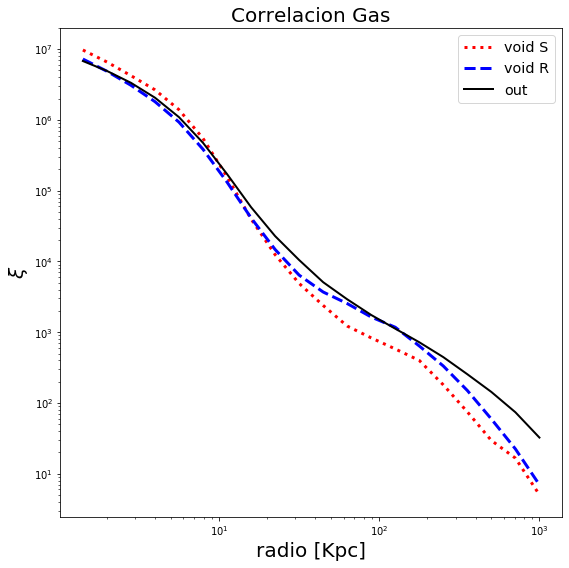

In [16]:
plt.figure(figsize=(9,9))
plt.title('Correlacion Gas',size=20)
plt.plot(s[:,0]*1e3,xi_gs_s,label='void S',ls='dotted',lw=3,color='red')
plt.plot(r[:,0]*1e3,xi_gs_r,label='void R',ls='--',lw=3,color='blue')
plt.plot(u[:,0]*1e3,xi_gs_u,label='out',color='black',lw=2)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Kpc]',size=20)
plt.semilogx()
plt.semilogy()

#plt.xlim(1,300)
#plt.ylim(50,2e7)
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/Correlacion_gas.png',format='png')

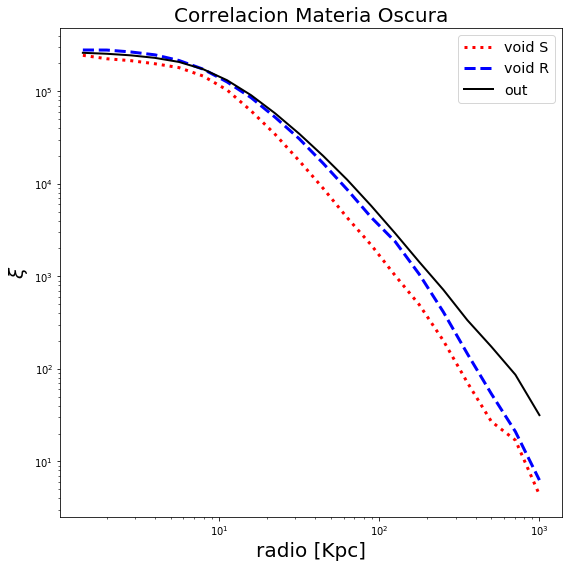

In [17]:
plt.figure(figsize=(9,9))
plt.title('Correlacion Materia Oscura',size=20)
plt.plot(s[:,0]*1e3,xi_dm_s,label='void S',ls='dotted',lw=3,color='red')
plt.plot(r[:,0]*1e3,xi_dm_r,label='void R',ls='--',lw=3,color='blue')
plt.plot(u[:,0]*1e3,xi_dm_u,label='out',color='black',lw=2)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Kpc]',size=20)
plt.semilogx()
plt.semilogy()

#plt.xlim(1,300)
#plt.ylim(50,1e6)
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/Correlacion_dm.png',format='png')

Prueba.......

In [59]:
s=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/correlacion_st.dat')

In [60]:
masa_gs = 0.0181731e10
lbox    = 125
#lbox = 500
vol=lbox**3

trazers_s=4900
trazers_hl=39


dpares_st_s=trazers_s*estrellas/vol
dpares_dm_s=trazers_s*darkmatter/vol
dpares_hl_s=trazers_s*850350/(500**3)

In [61]:
pares_teoricos_st_s=[]
pares_teoricos_dm_s=[]
pares_teoricos_hl_s=[]
rs=1

for i in range(len(s)):
    vs=(4./3.)*np.pi*(s[i,0]**3-rs**3)
    pares_teoricos_st_s.append(dpares_st_s*vs)
    pares_teoricos_dm_s.append(dpares_dm_s*vs)
    pares_teoricos_hl_s.append(dpares_hl_s*vs)
    rs=s[i,0]                  

In [64]:
pares_teoricos_st_s=np.array(pares_teoricos_st_s)
pares_teoricos_dm_s=np.array(pares_teoricos_dm_s)
pares_teoricos_hl_s=np.array(pares_teoricos_hl_s)

#xi_hl_s=s[:,4]/(pares_teoricos_hl_s)-1.
xi_dm_s=s[:,3]/(pares_teoricos_dm_s)-1
xi_st_s=s[:,1]/(pares_teoricos_st_s)-1

[]

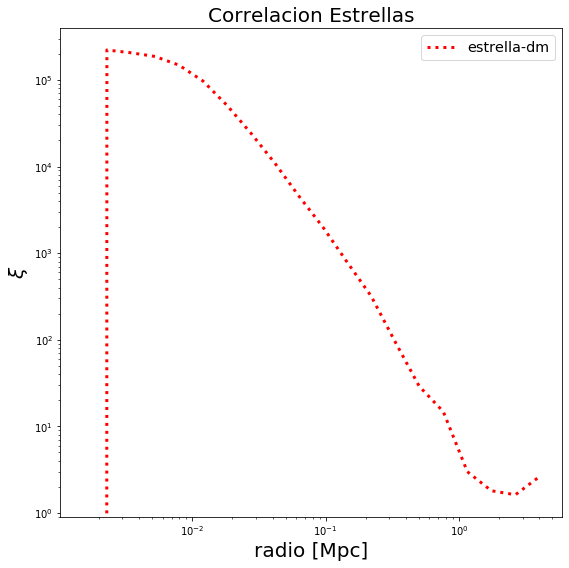

In [65]:
plt.figure(figsize=(9,9))
plt.title('Correlacion Estrellas',size=20)
plt.plot(s[:,0],xi_dm_s,label='estrella-dm',ls='dotted',lw=3,color='red')
#plt.plot(s[:,0],xi_hl_s*0.01,label='galaxia-dm',lw=3,color='black')

#plt.plot(s[:,1],xi_dm_s)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Mpc]',size=20)
plt.semilogx()
plt.semilogy()


In [44]:
gs=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/xigal_S.dat')
ss=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/xiest_S.dat')

gr=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/xigal_R.dat')
sr=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/xiest_R.dat')

out = np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/xiest_out.dat')
gout = np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/xigal_out.dat')

[]

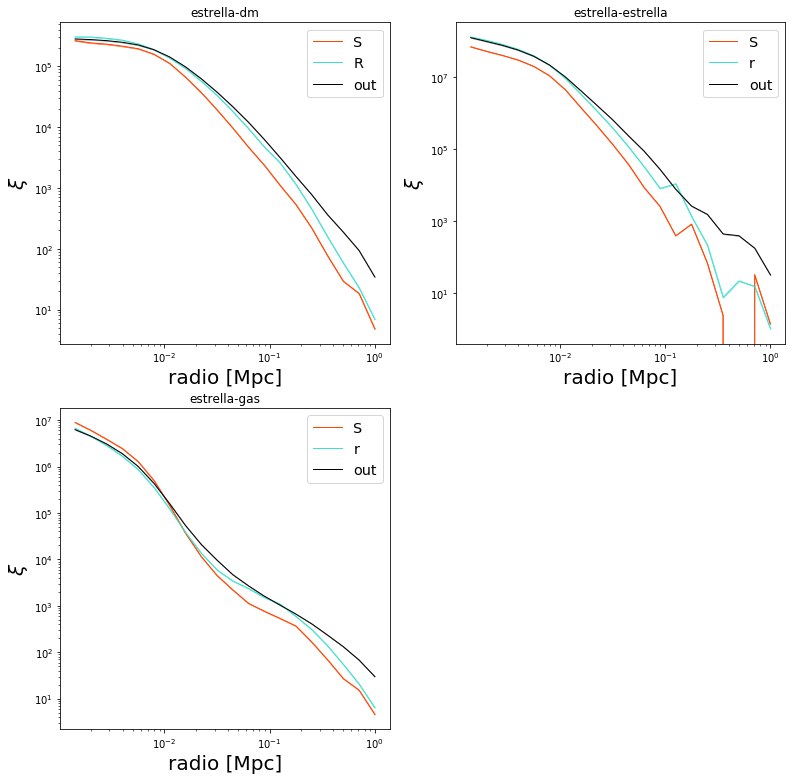

In [45]:
plt.figure(figsize=(13,13))
plt.subplot(221)
plt.title('estrella-dm')
plt.plot(ss[:,0],ss[:,2],label='S',lw=1,color='orangered')
plt.fill_between(ss[:,0], ss[:,2]-np.sqrt(ss[:,5]), ss[:,2]+np.sqrt(ss[:,5]),color='orangered', alpha=.5)
plt.plot(sr[:,0],sr[:,2],label='R',lw=1,color='turquoise')
plt.fill_between(sr[:,0], sr[:,2]-np.sqrt(sr[:,5]), sr[:,2]+np.sqrt(sr[:,5]),color='turquoise', alpha=.5)
plt.plot(out[:,0],out[:,2],label='out',lw=1,color='black')
plt.fill_between(out[:,0], out[:,2]-np.sqrt(out[:,5]), out[:,2]+np.sqrt(out[:,5]),color='grey', alpha=.5)


#plt.plot(s[:,1],xi_dm_s)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Mpc]',size=20)
plt.semilogx()
plt.semilogy()

plt.subplot(222)
plt.title('estrella-estrella')
plt.plot(ss[:,0],ss[:,1],label='S',lw=1,color='orangered')
plt.fill_between(ss[:,0], ss[:,1]-np.sqrt(ss[:,4]), ss[:,1]+np.sqrt(ss[:,4]),color='orangered', alpha=.5)
plt.plot(sr[:,0],sr[:,1],label='r',lw=1,color='turquoise')
plt.fill_between(sr[:,0], sr[:,1]-np.sqrt(sr[:,4]), sr[:,1]+np.sqrt(sr[:,4]),color='turquoise', alpha=.5)
plt.plot(out[:,0],out[:,1],label='out',lw=1,color='black')
plt.fill_between(out[:,0], out[:,1]-np.sqrt(out[:,4]), out[:,1]+np.sqrt(out[:,4]),color='grey', alpha=.5)

#plt.plot(s[:,1],xi_dm_s)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Mpc]',size=20)
plt.semilogx()
plt.semilogy()

plt.subplot(223)
plt.title('estrella-gas')
plt.plot(ss[:,0],ss[:,3],label='S',lw=1,color='orangered')
plt.fill_between(ss[:,0], ss[:,3]-np.sqrt(ss[:,6]), ss[:,3]+np.sqrt(ss[:,6]),color='orangered', alpha=.5)
plt.plot(sr[:,0],sr[:,3],label='r',lw=1,color='turquoise')
plt.fill_between(sr[:,0], sr[:,3]-np.sqrt(sr[:,6]), sr[:,3]+np.sqrt(sr[:,6]),color='turquoise', alpha=.5)
plt.plot(out[:,0],out[:,3],label='out',lw=1,color='black')
plt.fill_between(out[:,0], out[:,3]-np.sqrt(out[:,6]), out[:,3]+np.sqrt(out[:,6]),color='grey', alpha=.5)

#plt.plot(s[:,1],xi_dm_s)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Mpc]',size=20)
plt.semilogx()
plt.semilogy()

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/Plots/Correlaciones_est.png',format='png')

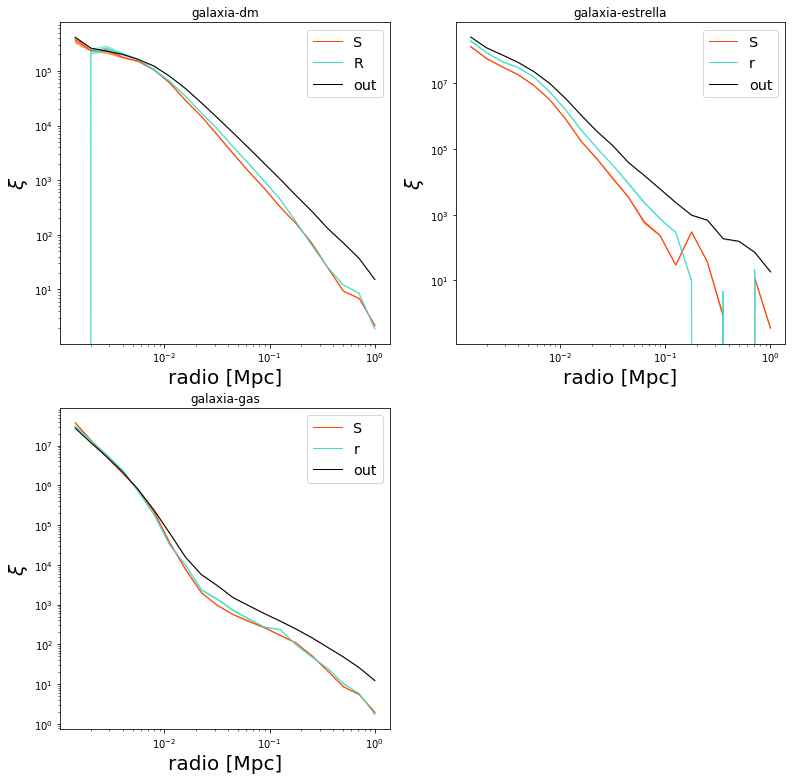

In [27]:
plt.figure(figsize=(13,13))
plt.subplot(221)
plt.title('galaxia-dm')
plt.plot(gs[:,0],gs[:,2],label='S',lw=1,color='orangered')
plt.fill_between(gs[:,0], gs[:,2]-np.sqrt(gs[:,5]), gs[:,2]+np.sqrt(gs[:,5]),color='orangered', alpha=.5)
plt.plot(gr[:,0],gr[:,2],label='R',lw=1,color='turquoise')
plt.fill_between(gr[:,0], gr[:,2]-np.sqrt(gr[:,5]), gr[:,2]+np.sqrt(gr[:,5]),color='turquoise', alpha=.5)
plt.plot(gout[:,0],gout[:,2],label='out',lw=1,color='black')
plt.fill_between(gout[:,0], gout[:,2]-np.sqrt(gout[:,5]), gout[:,2]+np.sqrt(gout[:,5]),color='grey', alpha=.5)

#plt.plot(s[:,1],xi_dm_s)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Mpc]',size=20)
plt.semilogx()
plt.semilogy()

plt.subplot(222)
plt.title('galaxia-estrella')
plt.plot(gs[:,0],gs[:,1],label='S',lw=1,color='orangered')
plt.fill_between(gs[:,0], gs[:,1]-np.sqrt(gs[:,4]), gs[:,1]+np.sqrt(gs[:,4]),color='orangered', alpha=.5)

plt.plot(gr[:,0],gr[:,1],label='r',lw=1,color='turquoise')
plt.fill_between(gr[:,0], gr[:,1]-np.sqrt(gr[:,4]), gr[:,1]+np.sqrt(gr[:,4]),color='turquoise', alpha=.5)
plt.plot(gout[:,0],gout[:,1],label='out',lw=1,color='black')
plt.fill_between(gout[:,0], gout[:,1]-np.sqrt(gout[:,4]), gout[:,1]+np.sqrt(gout[:,4]),color='grey', alpha=.5)

#plt.plot(s[:,1],xi_dm_s)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Mpc]',size=20)
plt.semilogx()
plt.semilogy()

plt.subplot(223)
plt.title('galaxia-gas')
plt.plot(gs[:,0],gs[:,3],label='S',lw=1,color='orangered')
plt.fill_between(gs[:,0], gs[:,3]-np.sqrt(gs[:,6]), gs[:,3]+np.sqrt(gs[:,6]),color='orangered', alpha=.5)
plt.plot(gr[:,0],gr[:,3],label='r',lw=1,color='turquoise')
plt.fill_between(gr[:,0], gr[:,3]-np.sqrt(gr[:,6]), gr[:,3]+np.sqrt(gr[:,6]),color='turquoise', alpha=.5)
plt.plot(gout[:,0],gout[:,3],label='out',lw=1,color='black')
plt.fill_between(gout[:,0], gout[:,3]-np.sqrt(gout[:,6]), gout[:,3]+np.sqrt(gout[:,6]),color='grey', alpha=.5)

#plt.plot(s[:,1],xi_dm_s)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Mpc]',size=20)
plt.semilogx()
plt.semilogy()

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/Plots/Correlaciones_gal.png',format='png')

In [39]:
s=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/correlacion.dat')

[]

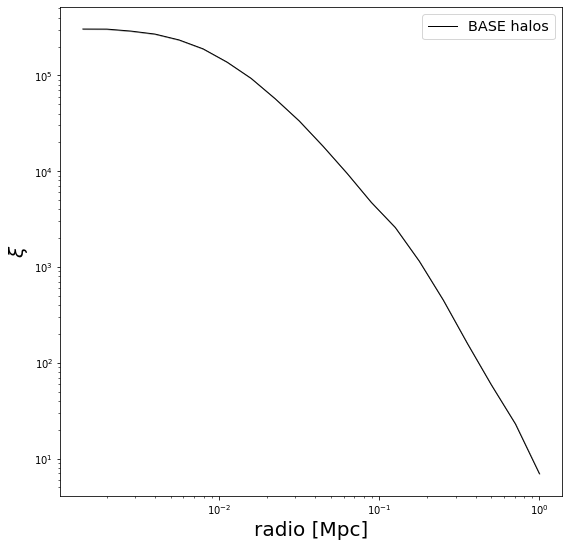

In [40]:
plt.figure(figsize=(9,9))
plt.plot(s[:,0],s[:,2],label='BASE halos',lw=1,color='black')
plt.fill_between(s[:,0], s[:,2]-np.sqrt(s[:,5]), s[:,2]+np.sqrt(s[:,5]),color='grey', alpha=.5)

plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Mpc]',size=20)
plt.semilogx()
plt.semilogy()

In [22]:
s[:,2]

array([1.21547914e+05, 1.17465898e+05, 1.00173797e+05, 7.56542578e+04,
       4.67134336e+04, 2.31380918e+04, 9.98300586e+03, 3.98375732e+03,
       1.62133826e+03, 7.46533081e+02, 4.10387756e+02, 2.66013397e+02,
       1.84151886e+02, 1.29619263e+02, 9.02831039e+01, 5.88748970e+01,
       3.13564968e+01, 1.49535065e+01, 7.14680719e+00, 4.07867861e+00])

In [34]:
s[:,0]

array([ 0.12589254,  0.15848932,  0.19952623,  0.25118865,  0.31622777,
        0.39810717,  0.50118724,  0.63095735,  0.79432824,  1.00000001,
        1.25892542,  1.5848932 ,  1.99526233,  2.51188644,  3.16227767,
        3.98107172,  5.01187235,  6.30957345,  7.94328235, 10.        ])

In [35]:
(4.12e-1 - 1.71e1)/(7.9-1)

-2.418550724637681